In [29]:
___Author___='LumberJack Jyss'

In [30]:
print('LumberJack BRUTAL AtidotCom TREND FORECAST\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom TREND FORECAST
LumberJack Jyss (c)


In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df =  pd.read_csv('simanim.csv')

In [33]:
df.head()

,Local time,Open_audusd,High_audusd,Low_audusd,Close_audusd,Volume_audusd,Open_usdjpy,High_usdjpy,Low_usdjpy,Close_usdjpy,...,Low_eurusd,Close_eurusd,Volume_eurusd,Macdsignal_eurusd,rsi_eurusd,BBup_eurusd,BBmid_eurusd,BBlow_eurusd,atr_eurusd,wclprince_eurusd
0,10.04.2004 02:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,...,1.20888,1.20888,0.0,-0.003009,37.355005,1.210666,1.209442,1.208217,0.001222,1.20888
1,10.04.2004 03:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,...,1.20888,1.20888,0.0,-0.003035,37.355005,1.210610,1.209471,1.208331,0.001134,1.20888
2,10.04.2004 04:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,...,1.20888,1.20888,0.0,-0.003060,37.355005,1.210553,1.209414,1.208275,0.001053,1.20888
3,10.04.2004 05:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,...,1.20888,1.20888,0.0,-0.003084,37.355005,1.210526,1.209373,1.208219,0.000978,1.20888
4,10.04.2004 06:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,...,1.20888,1.20888,0.0,-0.003107,37.355005,1.210429,1.209311,1.208192,0.000908,1.20888


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131566 entries, 0 to 131565
Data columns (total 43 columns):
Local time           131566 non-null object
Open_audusd          131566 non-null float64
High_audusd          131566 non-null float64
Low_audusd           131566 non-null float64
Close_audusd         131566 non-null float64
Volume_audusd        131566 non-null float64
Open_usdjpy          131566 non-null float64
High_usdjpy          131566 non-null float64
Low_usdjpy           131566 non-null float64
Close_usdjpy         131566 non-null float64
Volume_usdjpy        131566 non-null float64
Open_gbpusd          131566 non-null float64
High_gbpusd          131566 non-null float64
Low_gbpusd           131566 non-null float64
Close_gbpusd         131566 non-null float64
Volume_gbpusd        131566 non-null float64
Open_nzdusd          131566 non-null float64
High_nzdusd          131566 non-null float64
Low_nzdusd           131566 non-null float64
Close_nzdusd         131566 non-nul

In [35]:
df.shape

(131566, 43)

In [36]:
trend_label = []
var_list = []
target = 0.002
stop_loss = - 0.004
equity_list = []
equity = 100000
a = 0
pos = 0

for i in range(0,df.shape[0]):

    if a == 1:
        pos = 1
    elif a == 0:
        pos = 0
    
    candle_close = float(df.iloc[i,34])
    candle_open = float(df.iloc[i,31])
    candle_high = float(df.iloc[i,32])
    candle_low = float(df.iloc[i,33])
    
    if pos == 0:
        price_buy = candle_open
        equity = equity - 3.
        equity_list.append(equity)
        trend_label.append(0)
        var_list.append(0)
        a = 1

    
    if pos ==1:
        var = candle_close - price_buy
        if var > target : #and alerte < stop_loss :
            equity = equity + var*100000 - 3
            equity_list.append(equity)
            a = 0
            trend_label.append(1)
            var_list.append(var)
        
        elif var < stop_loss :
            equity = equity + var*100000 - 3
            equity_list.append(equity)
            a = 0
            trend_label.append(0)
            var_list.append(var)
        
        else :
            trend_label.append(0)
            var_list.append(var)
            equity_list.append(0)
            a = 1
        

var_dtf = pd.DataFrame()
var_dtf['Variations'] = var_list
var_dtf['Equity'] = equity_list

 
    

In [37]:
len(var_list),len(equity_list),len(trend_label),len(df.index)

(131566, 131566, 131566, 131566)

In [38]:
sum(trend_label)

6287

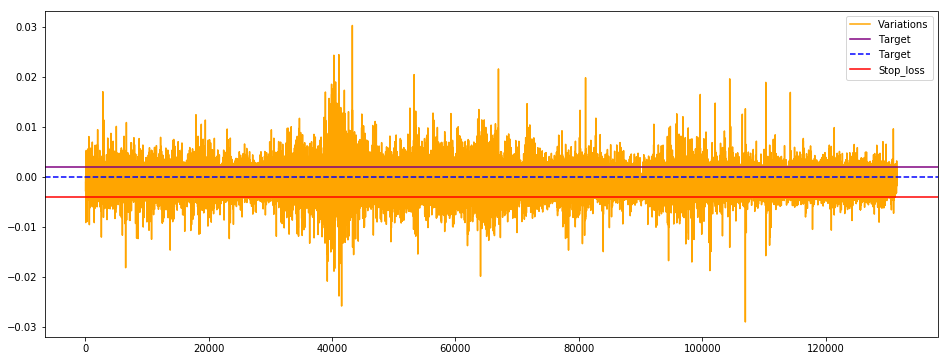

In [39]:
plt.figure(figsize=(16,6))
plt.plot(var_dtf['Variations'],color='orange',label='Variations')
plt.axhline(y=target, color='purple',linestyle='-', label='Target')
plt.axhline(y=0, color='blue',linestyle='--', label='Target')
plt.axhline(y=stop_loss,color='r',label='Stop_loss')
plt.legend()

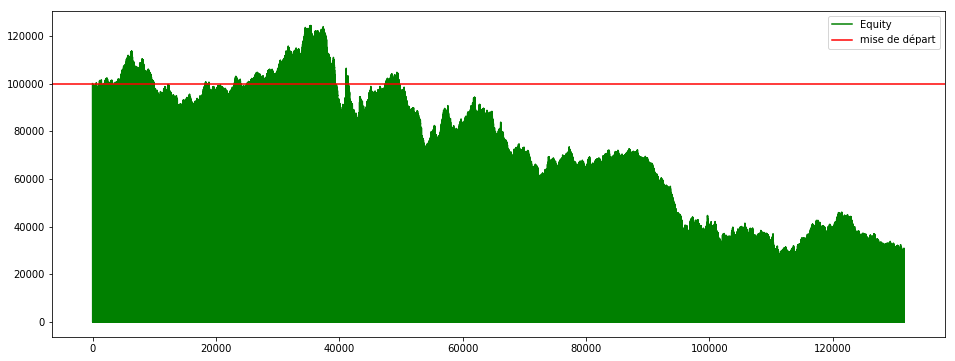

In [40]:
plt.figure(figsize=(16,6))
plt.plot(var_dtf['Equity'],color='green',label='Equity')
plt.axhline(y=100000., color='red',linestyle='-', label='mise de départ')
plt.legend()

In [41]:
df['trend'] = trend_label

In [42]:
print('Nombre de positions de long trouvées :',sum(trend_label),'sur un total de ',len(trend_label))

Nombre de positions de long trouvées : 6287 sur un total de  131566


In [43]:
print('Sur un achat systématique, les gains représentent',round((sum(trend_label)/len(trend_label))*100,2),'%')

Sur un achat systématique, les gains représentent 4.78 %


In [44]:
df['trend'] = df['trend'].shift(-1)

In [45]:
df.tail()

,Local time,Open_audusd,High_audusd,Low_audusd,Close_audusd,Volume_audusd,Open_usdjpy,High_usdjpy,Low_usdjpy,Close_usdjpy,...,Close_eurusd,Volume_eurusd,Macdsignal_eurusd,rsi_eurusd,BBup_eurusd,BBmid_eurusd,BBlow_eurusd,atr_eurusd,wclprince_eurusd,trend
131561,13.04.2019 19:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,1.13006,0.0,0.002625,47.79156,1.13006,1.13006,1.13006,0.000210,1.13006,0.0
131562,13.04.2019 20:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,1.13006,0.0,0.002628,47.79156,1.13006,1.13006,1.13006,0.000195,1.13006,0.0
131563,13.04.2019 21:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,1.13006,0.0,0.002630,47.79156,1.13006,1.13006,1.13006,0.000181,1.13006,0.0
131564,13.04.2019 22:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,1.13006,0.0,0.002630,47.79156,1.13006,1.13006,1.13006,0.000168,1.13006,0.0
131565,13.04.2019 23:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,1.13006,0.0,0.002630,47.79156,1.13006,1.13006,1.13006,0.000156,1.13006,NaN


In [46]:
df = df.dropna()
df.tail()

,Local time,Open_audusd,High_audusd,Low_audusd,Close_audusd,Volume_audusd,Open_usdjpy,High_usdjpy,Low_usdjpy,Close_usdjpy,...,Close_eurusd,Volume_eurusd,Macdsignal_eurusd,rsi_eurusd,BBup_eurusd,BBmid_eurusd,BBlow_eurusd,atr_eurusd,wclprince_eurusd,trend
131560,13.04.2019 18:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,1.13006,0.0,0.002621,47.79156,1.13006,1.13006,1.13006,0.000226,1.13006,0.0
131561,13.04.2019 19:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,1.13006,0.0,0.002625,47.79156,1.13006,1.13006,1.13006,0.000210,1.13006,0.0
131562,13.04.2019 20:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,1.13006,0.0,0.002628,47.79156,1.13006,1.13006,1.13006,0.000195,1.13006,0.0
131563,13.04.2019 21:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,1.13006,0.0,0.002630,47.79156,1.13006,1.13006,1.13006,0.000181,1.13006,0.0
131564,13.04.2019 22:00:00.000 GMT+0200,0.71749,0.71749,0.71749,0.71749,0.0,112.041,112.041,112.041,112.041,...,1.13006,0.0,0.002630,47.79156,1.13006,1.13006,1.13006,0.000168,1.13006,0.0


In [47]:
df['trend'].sum()

6287.0

In [48]:
df.to_csv('dataset_ready_to_use.csv')